In [159]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Recurrence free survival in breast cancer patients.csv')
data_x = df

# Use a compound data type for structured arrays
row_count = len(df)
data_y = np.zeros(row_count, dtype={'names':('Status', 'Survival_in_days'),
                          'formats':('?', 'f8')})
data_y['Status'] = df['status']
data_y['Survival_in_days'] = df['time']

In [160]:
data_y

array([( True, 1814.), ( True, 2018.), ( True,  712.), ( True, 1807.),
       ( True,  772.), ( True,  448.), (False, 2172.), (False, 2161.),
       ( True,  471.), (False, 2014.), ( True,  577.), ( True,  184.),
       (False, 1840.), (False, 1842.), (False, 1821.), ( True, 1371.),
       ( True,  707.), (False, 1743.), (False, 1781.), ( True,  865.),
       ( True, 1684.), (False, 1701.), (False, 1701.), (False, 1693.),
       ( True,  379.), ( True, 1105.), ( True,  548.), ( True, 1296.),
       (False, 1483.), (False, 1570.), (False, 1469.), (False, 1472.),
       (False, 1342.), (False, 1349.), ( True, 1162.), (False, 1342.),
       ( True,  797.), (False, 1232.), (False, 1230.), (False, 1205.),
       (False, 1090.), (False, 1095.), ( True,  449.), (False,  972.),
       (False,  825.), (False, 2438.), (False, 2233.), ( True,  286.),
       (False, 1861.), ( True, 1080.), ( True, 1521.), (False, 1693.),
       ( True, 1528.), ( True,  169.), ( True,  272.), ( True,  731.),
      

In [161]:
import pandas as pd

pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,Status,Survival_in_days
1,True,184.0
2,True,448.0
3,False,1342.0
4,False,1842.0
5,False,1693.0


Text(0.5, 0, 'time $t$')

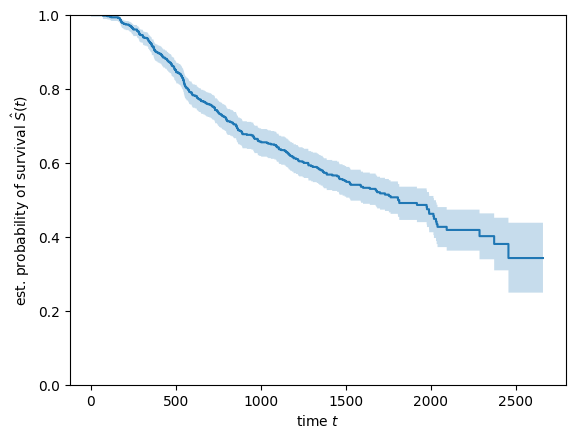

In [162]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Text(0.5, 0, 'time $t$')

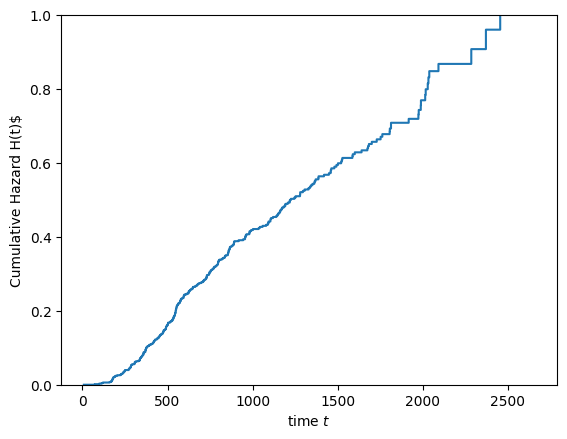

In [163]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import nelson_aalen_estimator

time, cum_hazard = nelson_aalen_estimator(
    data_y["Status"], data_y["Survival_in_days"])
plt.step(time, cum_hazard, where="post")
plt.ylim(0, 1)
plt.ylabel("Cumulative Hazard H(t)$")
plt.xlabel("time $t$")

In [164]:
from sklearn.preprocessing import StandardScaler
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.util import Surv

# Define the features (X) and the survival data (y)
features = ['treat', 'age', 'men', 'size', 'grade', 'nodes', 'prog', 'oest']
data_x = df[features]
data_y = Surv.from_arrays(event=df['status'] == 1, time=df['time'])

# Standardize the feature variables
scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x)

# Fit the Cox Proportional Hazards model
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_scaled, data_y)

CoxPHSurvivalAnalysis()

In [165]:
print(f'Concordance: {estimator.score(data_x_scaled, data_y)}')

Concordance: 0.6879809426475892


In [166]:
estimator = CoxPHSurvivalAnalysis().fit(data_x, data_y)

In [167]:
urv_funcs = estimator.predict_survival_function(data_x.iloc[:10])

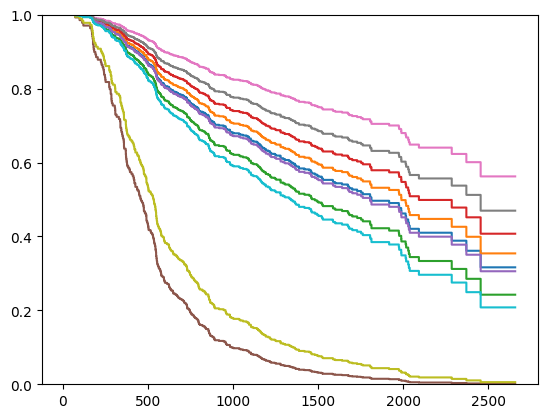

In [168]:
import matplotlib.pyplot as plt

for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()